## Marketing Mixed Modeling

1) Importing Libraries
2) Reading the data
3) EDA
4) Simple Linear Regression Model
5) Ad-stock & Diminishing Effects application
6) Optimizing alpha, beta values using bayesian optimization and fitting the model
7) Comparing model performance on above 3 scenarios (simple linear regression, applying ad-stock and diminishing effect, Bayesian Optimization)
8) Budget Allocation

In [212]:
#Importing Librraies
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as sm
from skopt import gp_minimize
from skopt.space import Real
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error

In [213]:
#Reading the data
file_path = r'C:\Users\nafee\Desktop\Projects\MMM_Project\MARKETING MIX MODELING YT.xlsx'
df = pd.read_excel(file_path)
print(df)

       Time  sales     FB    TV  Radio       Date
0    Week 1   22.1  230.1  37.8   69.2 2020-01-01
1    Week 2   10.4   44.5  39.3   45.1 2020-01-02
2    Week 3    9.3   17.2  45.9   69.3 2020-01-03
3    Week 4   18.5  151.5  41.3   58.5 2020-01-04
4    Week 5   12.9  180.8  10.8   58.4 2020-01-05
5    Week 6    7.2    8.7  48.9   75.0 2020-01-06
6    Week 7   11.8   57.5  32.8   23.5 2020-01-07
7    Week 8   13.2  120.2  19.6   11.6 2020-01-08
8    Week 9    4.8    8.6   2.1    1.0 2020-01-09
9   Week 10   10.6  199.8   2.6   21.2 2020-01-10
10  Week 11    8.6   66.1   5.8   24.2 2020-01-11
11  Week 12   17.4  214.7  24.0    4.0 2020-01-12
12  Week 13    9.2   23.8  35.1   65.9 2020-01-13
13  Week 14    9.7   97.5   7.6    7.2 2020-01-14
14  Week 15   19.0  204.1  32.9   46.0 2020-01-15
15  Week 16   22.4  195.4  47.7   52.9 2020-01-16
16  Week 17   12.5   67.8  36.6  114.0 2020-01-17
17  Week 18   24.4  281.4  39.6   55.8 2020-01-18
18  Week 19   11.3   69.2  20.5   18.3 2020-01-19


In [214]:
# Visualizing sales vs marketing channels
fig = px.line(df, x= 'Time', y= ['sales','FB','TV','Radio'])
fig.show()

In [215]:
#correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
print(corr_matrix)

          sales        FB        TV     Radio
sales  1.000000  0.787713  0.423651  0.142462
FB     0.787713  1.000000 -0.106758 -0.159078
TV     0.423651 -0.106758  1.000000  0.648448
Radio  0.142462 -0.159078  0.648448  1.000000


In [216]:
#Visulaizing marketing channels using scatter plot
fig1 = px.scatter(df, x='FB', y='sales')
fig2 = px.scatter(df, x='TV', y='sales')
fig3 = px.scatter(df, x='Radio', y='sales')

fig1.show()
fig2.show()
fig3.show()

***Implementing a simple linear regression model using the Ordinary Least Squares (OLS) method from the statsmodels library in Python***

** Fitting model with all 3 variables FB, TV, Radio**

In [217]:
#Fitting Simple Linear Regression model with 3 variables
inputs = ['FB', 'TV', 'Radio']

X= df[inputs]
y= df['sales']
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     67.94
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.97e-12
Time:                        00:14:35   Log-Likelihood:                -57.368
No. Observations:                  30   AIC:                             122.7
Df Residuals:                      26   BIC:                             128.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0104      0.879      3.423      0.0

**Fitting model with only 2 variables FB & TV **

In [218]:
#Fitting Simple Linear Regression model with 2 variables
inputs = ['FB', 'TV']

X= df[inputs]
y= df['sales']
X = sm.add_constant(X)

result = sm.OLS(y, X).fit()
 
# printing the summary table
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     100.2
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           3.21e-13
Time:                        00:14:35   Log-Likelihood:                -58.092
No. Observations:                  30   AIC:                             122.2
Df Residuals:                      27   BIC:                             126.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7567      0.855      3.225      0.0

## Splittind data into Train & Test and Fitting the Model

In [219]:
#Splitting data & Fitting model
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.5)

model = LinearRegression()

model.fit(X_train, y_train)
print(
    model.score(X_train, y_train),
    model.score(X_test, y_test)
)

0.8958829606206765 0.779954386395269


In [220]:
#Visulaizing actual vs predicted
df['prediction']= model.predict(X)

fig = px.line(df, x='Time', y=['sales', 'prediction'])
fig.show()

## Ad-stock Effect

In [221]:
# Defining Ad-stock & Diminishing Returns
def adstock(ad_spend, alpha, beta):
    adstock = np.zeros(len(ad_spend))
    adstock[0] = ad_spend[0]
    
    for i in range(1, len(ad_spend)):
        adstock[i] = alpha * ad_spend[i] + beta * adstock[i-1]
    
    return adstock

def diminishing_returns(adstock, alpha):
    return adstock ** alpha

In [222]:
# Define Adstock and Diminishing Returns parameters
alpha_tv = 0.5
beta_tv = 0.7
alpha_radio = 0.6
beta_radio = 0.8
alpha_fb = 0.4
beta_fb = 0.9

# Apply Adstock transformation to TV, Radio, and FB
df['TV_Adstock'] = adstock(df['TV'], alpha_tv, beta_tv)
df['Radio_Adstock'] = adstock(df['Radio'], alpha_radio, beta_radio)
df['FB_Adstock'] = adstock(df['FB'], alpha_fb, beta_fb)

# Apply Diminishing Returns transformation to Adstock values
df['TV_Diminish'] = diminishing_returns(df['TV_Adstock'], alpha_tv)
df['Radio_Diminish'] = diminishing_returns(df['Radio_Adstock'], alpha_radio)
df['FB_Diminish'] = diminishing_returns(df['FB_Adstock'], alpha_fb)

# Define a linear regression model
from sklearn.linear_model import LinearRegression
X = df[['TV_Diminish', 'Radio_Diminish', 'FB_Diminish']]
y = df['sales']
model = LinearRegression()
model.fit(X, y)

# Evaluate model performance using mean squared error
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred) 

df['prediction_adstock_diminishing'] = y_pred

# Print coefficients
print('Coefficients:')
print('TV:', model.coef_[0])
print('Radio:', model.coef_[1])
print('FB:', model.coef_[2])
print('MSE:',mse)

Coefficients:
TV: 5.09367531871046
Radio: -1.5100139232869418
FB: 1.9330540819478368
MSE: 15.32764054953673


## Optimizing Model Performance through Alpha & Beta

In [223]:
# Define objective function to optimize
def objective(params):
    alpha_tv, beta_tv, alpha_radio, beta_radio, alpha_fb, beta_fb = params
    
    # Apply Adstock transformation to TV, Radio, and FB
    df['TV_Adstock'] = adstock(df['TV'], alpha_tv, beta_tv)
    df['Radio_Adstock'] = adstock(df['Radio'], alpha_radio, beta_radio)
    df['FB_Adstock'] = adstock(df['FB'], alpha_fb, beta_fb)

    # Apply Diminishing Returns transformation to Adstock values
    df['TV_Diminish'] = diminishing_returns(df['TV_Adstock'], alpha_tv)
    df['Radio_Diminish'] = diminishing_returns(df['Radio_Adstock'], alpha_radio)
    df['FB_Diminish'] = diminishing_returns(df['FB_Adstock'], alpha_fb)

    # Define a linear regression model
    X = df[['TV_Diminish', 'Radio_Diminish', 'FB_Diminish']]
    y = df['sales']
    model = LinearRegression()
    model.fit(X, y)

    # Evaluate model performance using mean squared error
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    
    return mse

# Define search space for alpha and beta parameters
search_space = [
    Real(0, 1, name='alpha_tv'),
    Real(0, 1, name='beta_tv'),
    Real(0, 1, name='alpha_radio'),
    Real(0, 1, name='beta_radio'),
    Real(0, 1, name='alpha_fb'),
    Real(0, 1, name='beta_fb')
]

# Perform Bayesian optimization
res_gp = gp_minimize(objective, search_space, n_calls=50, random_state=42)

# Print optimized alpha and beta parameters
print('Optimized parameters:')
print('Alpha TV:', res_gp.x[0])
print('Beta TV:', res_gp.x[1])
print('Alpha Radio:', res_gp.x[2])
print('Beta Radio:', res_gp.x[3])
print('Alpha FB:', res_gp.x[4])
print('Beta FB:', res_gp.x[5])

# Use optimized parameters to calculate Adstock and Diminishing Returns
alpha_tv, beta_tv, alpha_radio, beta_radio, alpha_fb, beta_fb = res_gp.x

df['TV_Adstock'] = adstock(df['TV'], alpha_tv, beta_tv)
df['Radio_Adstock'] = adstock(df['Radio'], alpha_radio, beta_radio)
df['FB_Adstock'] = adstock(df['FB'], alpha_fb, beta_fb)

df['TV_Diminish'] = diminishing_returns(df['TV_Adstock'], alpha_tv)
df['Radio_Diminish'] = diminishing_returns(df['Radio_Adstock'], alpha_radio)
df['FB_Diminish'] = diminishing_returns(df['FB_Adstock'], alpha_fb)

# Define a linear regression model
X = df[['TV_Diminish', 'Radio_Diminish', 'FB_Diminish']]
y = df['sales']
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

df['prediction_optimized_adstock_diminishing'] = y_pred

print('Model performance:')
print('MSE:', mse)
print('R2:', r2)

Optimized parameters:
Alpha TV: 1.0
Beta TV: 0.1731197929353709
Alpha Radio: 1.0
Beta Radio: 0.0
Alpha FB: 0.6001578988036956
Beta FB: 0.020316437606158665
Model performance:
MSE: 1.7745004977201242
R2: 0.9251534049931407


In [224]:
df.head(10)

,Time,sales,FB,TV,Radio,Date,prediction,TV_Adstock,Radio_Adstock,FB_Adstock,TV_Diminish,Radio_Diminish,FB_Diminish,prediction_adstock_diminishing,prediction_optimized_adstock_diminishing
0,Week 1,22.1,230.1,37.8,69.2,2020-01-01,20.572862,37.800000,69.2,230.100000,37.800000,69.2,26.153084,14.214677,22.743921
1,Week 2,10.4,44.5,39.3,45.1,2020-01-02,10.726963,45.843928,45.1,31.381839,45.843928,45.1,7.911218,15.208754,12.527455
2,Week 3,9.3,17.2,45.9,69.3,2020-01-03,10.160978,53.836491,69.3,10.960283,53.836491,69.3,4.207821,14.310835,10.881805
3,Week 4,18.5,151.5,41.3,58.5,2020-01-04,16.799400,50.620162,58.5,91.146596,50.620162,58.5,15.002157,15.011876,17.888798
4,Week 5,12.9,180.8,10.8,58.4,2020-01-05,14.168394,19.563352,58.4,110.360322,19.563352,58.4,16.827141,10.528608,13.245041
5,Week 6,7.2,8.7,48.9,75.0,2020-01-06,10.115455,52.286803,75.0,7.463502,52.286803,75.0,3.341207,11.181392,9.847623
6,Week 7,11.8,57.5,32.8,23.5,2020-01-07,10.532193,41.851881,23.5,34.660711,41.851881,23.5,8.397415,12.802443,12.677680
7,Week 8,13.2,120.2,19.6,11.6,2020-01-08,12.102913,26.845389,11.6,72.843162,26.845389,11.6,13.113763,13.490873,13.353470
8,Week 9,4.8,8.6,2.1,1.0,2020-01-09,3.637689,6.747468,1.0,6.641271,6.747468,1.0,3.115162,10.589050,3.039870
9,Week 10,10.6,199.8,2.6,21.2,2020-01-10,14.063518,3.768120,21.2,120.046475,3.768120,21.2,17.698562,8.528091,11.836516


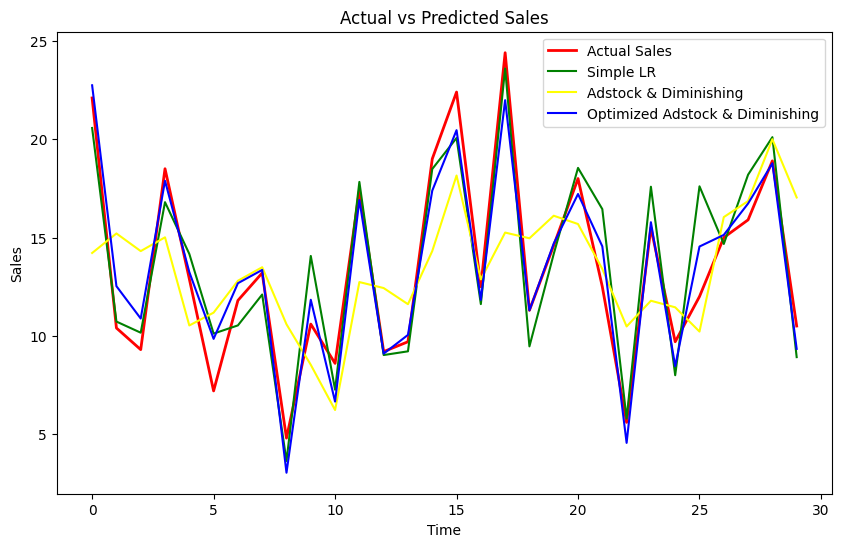

In [225]:
import matplotlib.pyplot as plt

# Plot actual sales and predicted sales from each model
plt.figure(figsize=(10,6))
plt.plot(df['sales'], label='Actual Sales', color='red', linewidth=2)
plt.plot(df['prediction'], label='Simple LR', color='Green')
plt.plot(df['prediction_adstock_diminishing'], label='Adstock & Diminishing', color='yellow')
plt.plot(df['prediction_optimized_adstock_diminishing'], label='Optimized Adstock & Diminishing', color='blue')

plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

By observing the graph we can clearly see that using Optimized alpha and beta has better predictions compared to non-optimal alpha, beta and simple linear regression model which is overfitting the data.

## Budgeting (Assumption Total Budget=1000)

In [228]:
# Get the coefficients from the optimized model
alpha_tv, beta_tv, alpha_radio, beta_radio, alpha_fb, beta_fb = res_gp.x

# Define the budget
budget = 1000

# Calculate the marginal ROI for each channel
marginal_roi_tv = max(model.coef_[0] / alpha_tv, 0)
marginal_roi_radio = max(model.coef_[1] / alpha_radio, 0)
marginal_roi_fb = max(model.coef_[2] / alpha_fb, 0)

# Print the marginal ROI for each channel
print('Marginal ROI for each channel:')
print('TV:', marginal_roi_tv)
print('Radio:', marginal_roi_radio)
print('FB:', marginal_roi_fb)

# Allocate the budget to each channel based on the marginal ROI
total_roi = marginal_roi_tv + marginal_roi_radio + marginal_roi_fb

if total_roi == 0:
    budget_tv = budget / 3
    budget_radio = budget / 3
    budget_fb = budget / 3
else:
    budget_tv = max(budget * (marginal_roi_tv / total_roi), 50)
    budget_radio = max(budget * (marginal_roi_radio / total_roi), 50)
    budget_fb = max(budget * (marginal_roi_fb / total_roi), 50)

# Adjust the budgets to ensure they add up to the total budget
total_allocated = budget_tv + budget_radio + budget_fb
if total_allocated > budget:
    budget_tv = budget_tv * budget / total_allocated
    budget_radio = budget_radio * budget / total_allocated
    budget_fb = budget_fb * budget / total_allocated

# Print the allocated budget for each channel
print('Allocated budget for each channel:')
print('TV:', budget_tv)
print('Radio:', budget_radio)
print('FB:', budget_fb)

Marginal ROI for each channel:
TV: 0.18950401566362657
Radio: 0
FB: 1.131186093846434
Allocated budget for each channel:
TV: 136.65583895732564
Radio: 47.61904761904762
FB: 815.7251134236267
